In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
excel_file_path = "C:/Users/Kyle/Documents/US Foods/Survey Data Assessment Final.xlsx"  # Replace with the actual path
df = pd.read_excel(excel_file_path)

# Clean up column names
df.columns = df.columns.str.strip()

# Display the first few rows to get an idea of the data structure
print("First few rows of data:")
print(df.head())

# Basic summary statistics
print("\nSummary statistics:")
print(df.describe())

# Average weekly spend by customer
print("\nAverage weekly spend by customer:")
avg_weekly_spend = df.groupby('CUST_NBR')['REPORTED_WKLY_SPEND'].mean()
print(avg_weekly_spend)

# Customers with the highest average weekly spend
print("\nTop 5 customers with the highest average weekly spend:")
print(avg_weekly_spend.nlargest(5))

# Correlation between columns
print("\nCorrelation between columns:")
print(df.corr())

# Ranking based on different ranks
print("\nAverage SMALL_QTY_RANK by customer:")
print(df.groupby('CUST_NBR')['SMALL_QTY_RANK'].mean())

print("\nAverage DEL_FLEX_RANK by customer:")
print(df.groupby('CUST_NBR')['DEL_FLEX_RANK'].mean())

print("\nAverage CUT_TIME_RANK by customer:")
print(df.groupby('CUST_NBR')['CUT_TIME_RANK'].mean())


First few rows of data:
   CUST_NBR  REPORTED_WKLY_SPEND  REPORTED_WKLY_SPEND_USF   
0     24682          53874.74544              53731.46154  \
1     40724          13023.91865              13023.91865   
2     40724          13023.91865              13023.91865   
3     40724          13023.91865              13023.91865   
4     40724          13023.91865              13023.91865   

   REPORTED_WKLY_SPEND_USF_DAILY_SERVICE  REPORTED_WKLY_SPEND_COMP   
0                            53803.10349                143.283897  \
1                            13023.91865                  0.000000   
2                            13023.91865                  0.000000   
3                            13023.91865                  0.000000   
4                            13023.91865                  0.000000   

   REPORTED_WKLY_SPEND_COMPETITOR_1  REPORTED_WKLY_SPEND_OTHER_BLD   
0                               0.0                     143.283897  \
1                               0.0             

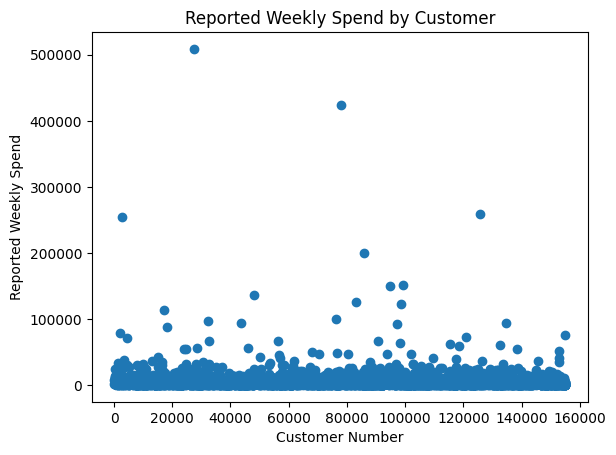

In [9]:
# Basic plot to visualize the data
plt.scatter(df['CUST_NBR'], df['REPORTED_WKLY_SPEND'])
plt.xlabel('Customer Number')
plt.ylabel('Reported Weekly Spend')
plt.title('Reported Weekly Spend by Customer')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cleaning the column names as before
df.columns = df.columns.str.strip()

# Selecting independent and dependent variables
X = df[['REPORTED_WKLY_SPEND', 'REPORTED_COP_SPEND', 'REPORTED_PRODUCE_SPEND', 'SMALL_QTY_RANK', 'DEL_FLEX_RANK', 'CUT_TIME_RANK']]
y = df['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Square Error: {rmse}')

Root Mean Square Error: 3500.1122949385153


In [18]:
# Interpretation
## This means on average the model's predictions are approximately $3500.11 off from the actual values. 
## In order to understand if this is good or bad. We will need to compare it with the range or mean of the dependent variable
## "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE." For instance, if the mean spend is around $50000, an RMSE of $3500 could be 
## considered relatively small. However, if the mean spend is around $5000, then an RMSE of $3500 is quite large.

In [10]:
import pandas as pd

# Calculate the mean and standard deviation of the dependent variable
mean_spend = df['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'].mean()
std_spend = df['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'].std()

# Your RMSE value
rmse = 3500.1122949385153

# Calculate what percentage of the mean the RMSE is
rmse_as_percent_of_mean = (rmse / mean_spend) * 100

# Determine if the RMSE is "good" or "bad"
if rmse_as_percent_of_mean < 10:  # Threshold set to 10% as an example, you can change it according to your business need
    print(f"The RMSE is good. It is {rmse_as_percent_of_mean:.2f}% of the mean weekly spend.")
elif rmse <= std_spend:
    print(f"The RMSE is moderate. It is less than one standard deviation of the weekly spend.")
else:
    print(f"The RMSE is bad. It is {rmse_as_percent_of_mean:.2f}% of the mean weekly spend and greater than one standard deviation.")

# Print additional context
print(f"Mean Weekly Spend: ${mean_spend:.2f}")
print(f"Standard Deviation of Weekly Spend: ${std_spend:.2f}")

The RMSE is moderate. It is less than one standard deviation of the weekly spend.
Mean Weekly Spend: $3430.16
Standard Deviation of Weekly Spend: $6768.40


In [24]:
# Import libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# For demonstration, let's create a sample DataFrame
# Uncomment this line to read from your actual data
# df = pd.read_csv("your_data.csv")
df = pd.DataFrame({
    'CUST_NBR': range(1, 11),
    'REPORTED_WKLY_SPEND': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'REPORTED_WKLY_SPEND_USF': [450, 950, 1600, 1800, 2700, 2800, 3700, 3800, 4700, 5000]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Create some example figures using Plotly Express
# These figures will be updated in the callback
fig_summary = px.scatter(df, x='REPORTED_WKLY_SPEND', y='REPORTED_WKLY_SPEND_USF')
fig_segmentation = px.bar(df, x='CUST_NBR', y='REPORTED_WKLY_SPEND')
fig_spending = px.line(df, x='CUST_NBR', y='REPORTED_WKLY_SPEND_USF')

# Define the layout of the app
app.layout = html.Div([
    html.H1("US Foods – Daily Delivery Service Analytics Dashboard"),
    
    html.Div([
        html.H3("Overview"),
        html.P("Your overview text here.")
    ]),
    
    html.Div([
        html.H3("Data Summary"),
        dcc.Graph(id='data-summary-plot', figure=fig_summary)
    ]),
    
    html.Div([
        html.H3("Customer Segmentation"),
        dcc.Graph(id='customer-segmentation-plot', figure=fig_segmentation)
    ]),
    
    html.Div([
        html.H3("Spending Patterns"),
        dcc.Slider(
            id='spending-slider',
            min=0,
            max=5000,
            step=100,
            value=2500,
        ),
        dcc.Graph(id='spending-patterns-plot', figure=fig_spending)
    ]),
    
    html.Div([
        html.H3("Model Summary"),
        html.P("RMSE: 3500.1122949385153"),  
        html.P("Model Interpretation: Good or Bad")
    ]),
    
    html.Div([
        html.H3("Recommendations"),
        html.P("Your recommendations here.")
    ]),
])

# Callback for updating the Spending Patterns plot based on the slider
@app.callback(
    Output('spending-patterns-plot', 'figure'),
    [Input('spending-slider', 'value')]
)
def update_spending_plot(selected_value):
    filtered_df = df[df['REPORTED_WKLY_SPEND'] >= selected_value]
    fig = px.line(filtered_df, x='CUST_NBR', y='REPORTED_WKLY_SPEND_USF')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [30]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Read your data from Excel file
df_survey = pd.read_excel("C:/Users/Kyle/Documents/US Foods/Survey Data Assessment Final.xlsx", sheet_name='survey_data_assessment')
df_transaction = pd.read_excel("C:/Users/Kyle/Documents/US Foods/Survey Data Assessment Final.xlsx", sheet_name='transactional_data')

# Initialize the Dash app
app = dash.Dash(__name__)

# Create a list of all headers from both DataFrames
all_headers = list(df_survey.columns) + list(df_transaction.columns)

# List of plot types
plot_types = ['Scatter', 'Bar', 'Line']

# Define the layout of the app
app.layout = html.Div([
    html.H1("US Foods – Analytics Dashboard"),
    
    # Dropdowns for x and y axis selection and plot type
    dcc.Dropdown(
        id='xaxis-column',
        options=[{'label': i, 'value': i} for i in all_headers],
        value='REPORTED_WKLY_SPEND'
    ),
    dcc.Dropdown(
        id='yaxis-column',
        options=[{'label': i, 'value': i} for i in all_headers],
        value='AVG_WKLY_SALES'
    ),
    dcc.Dropdown(
        id='plot-type',
        options=[{'label': i, 'value': i.lower()} for i in plot_types],
        value='scatter'
    ),
    
    # Graph placeholder
    dcc.Graph(id='main-plot'),
])

# Define callback to update graph
@app.callback(
    Output('main-plot', 'figure'),
    [Input('xaxis-column', 'value'),
     Input('yaxis-column', 'value'),
     Input('plot-type', 'value')]
)
def update_graph(xaxis_column_name, yaxis_column_name, plot_type):
    if xaxis_column_name in df_survey.columns:
        xdata = df_survey[xaxis_column_name]
    else:
        xdata = df_transaction[xaxis_column_name]
        
    if yaxis_column_name in df_survey.columns:
        ydata = df_survey[yaxis_column_name]
    else:
        ydata = df_transaction[yaxis_column_name]
    
    if plot_type == 'scatter':
        fig = px.scatter(x=xdata, y=ydata)
    elif plot_type == 'bar':
        fig = px.bar(x=xdata, y=ydata)
    elif plot_type == 'line':
        fig = px.line(x=xdata, y=ydata)
    else:
        fig = px.scatter(x=xdata, y=ydata)  # Default to scatter plot
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       53874.745440
1       13023.918650
2     ...REPORTED_WKLY_SPEND, Length: 4031, dtype: float64,
    y=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       53874.745440
1       13023.918650
2     ...REPORTED_WKLY_SPEND, Length: 4031, dtype: float64,
    y=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0       53874.745440
1       13023.918650
2     ...REPORTED_WKLY_SPEND, Length: 4031, dtype: float64,
    y=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0       53874.745440
1       13023.918650
2     ...REPORTED_WKLY_SPEND, Length: 4031, dtype: float64,
    y=0         67.038552
1         77.259901
2       ...me: AVG_WKLY_CASES, Length: 10224, dtype: float64,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    y=0         67.038552
1         77.259901
2       ...me: AVG_WKLY_CASES, Length: 10224, dtype: float64,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    y=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    y=0        0.191835
1        0.317608
2        0.0...2746
Name: PERC_EB, Length: 10224, dtype: float64,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    y=0                     MT UNAVAILABLE
1        SA...Name: MENU_TYP_DESC, Length: 10224, dtype: object,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:373, in bar(
    data_frame=None,
    x=0       143.283897
1         0.000000
2         ...TED_WKLY_SPEND_COMP, Length: 4031, dtype: float64,
    y=0                     MT UNAVAILABLE
1        SA...Name: MENU_TYP_DESC, Length: 10224, dtype: object,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    p

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       143.283897
1         0.000000
2         ...TED_WKLY_SPEND_COMP, Length: 4031, dtype: float64,
    y=0                     MT UNAVAILABLE
1        SA...Name: MENU_TYP_DESC, Length: 10224, dtype: object,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       143.283897
1         0.000000
2         ...KLY_SPEND_OTHER_BLD, Length: 4031, dtype: float64,
    y=0                     MT UNAVAILABLE
1        SA...Name: MENU_TYP_DESC, Length: 10224, dtype: object,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       9
1       1
2       9
3       3
4       ...0
Name: DEL_FLEX_RANK, Length: 4031, dtype: int64,
    y=0                     MT UNAVAILABLE
1        SA...Name: MENU_TYP_DESC, Length: 10224, dtype: object,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    y=0         67.038552
1         77.259901
2       ...me: AVG_WKLY_CASES, Length: 10224, dtype: float64,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    y=0        24682
1        40724
2        40724
3  ... 29279
Name: CUST_NBR, Length: 4031, dtype: int64,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\plotly\express\_chart_types.py:66, in scatter(
    data_frame=None,
    x=0       53803.103490
1       13023.918650
2     ...D_USF_DAILY_SERVICE, Length: 4031, dtype: float64,
    y=0         2656.049035
1         3272.965625
2   ...me: AVG_WKLY_SALES, Length: 10224, dtype: float64,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous

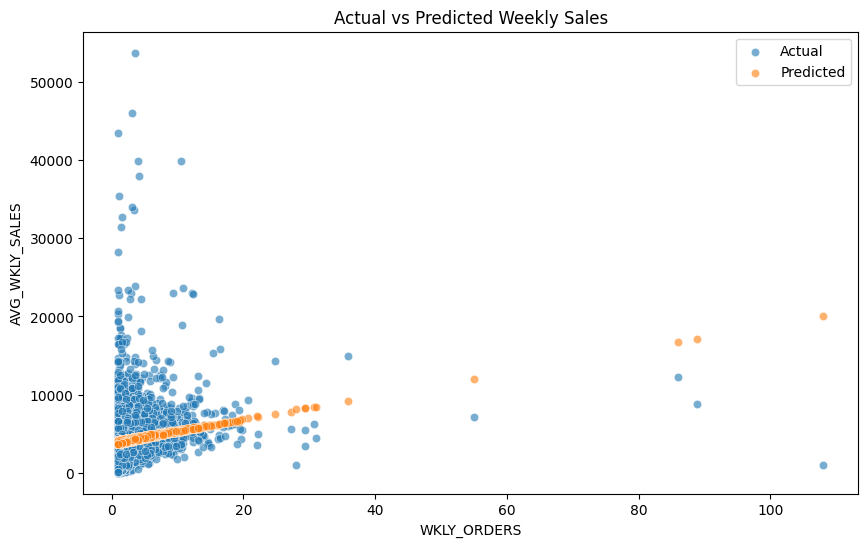

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_transaction is your DataFrame
# Drop rows with NaN values in the columns you'll use
df_transaction = df_transaction.dropna(subset=["WKLY_ORDERS", "PERC_EB", "AVG_WKLY_SALES"])

# Define the feature matrix and the target vector
X = df_transaction[["WKLY_ORDERS", "PERC_EB"]]
y = df_transaction["AVG_WKLY_SALES"]

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions
df_transaction["Predicted_AVG_WKLY_SALES"] = model.predict(X)

# Now, for visualization
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
sns.scatterplot(x="WKLY_ORDERS", y="AVG_WKLY_SALES", data=df_transaction, label="Actual", alpha=0.6)

# Scatter plot for predicted values
sns.scatterplot(x="WKLY_ORDERS", y="Predicted_AVG_WKLY_SALES", data=df_transaction, label="Predicted", alpha=0.6)

plt.title("Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

RMSE:  7932.976374572775


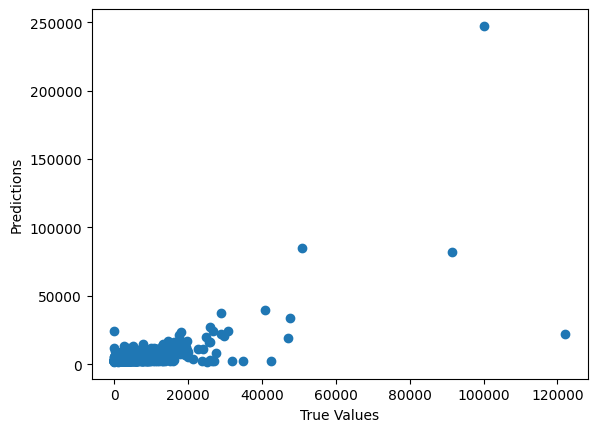

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df_survey is your DataFrame
# Drop rows with NaN values in the columns you'll use
df_survey = df_survey.dropna(subset=["REPORTED_COP_SPEND", "REPORTED_PRODUCE_SPEND", "SMALL_QTY_RANK", "DEL_FLEX_RANK", "CUT_TIME_RANK"])

# Define the feature matrix and the target vector
X = df_survey[["REPORTED_COP_SPEND", "REPORTED_PRODUCE_SPEND", "SMALL_QTY_RANK", "DEL_FLEX_RANK", "CUT_TIME_RANK"]]
y = df_survey["REPORTED_WKLY_SPEND"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [38]:
# Feature Selection
# Compute correlation matrix
corr = df_survey.corr()

# Correlation with output variable
corr_target = abs(corr["REPORTED_WKLY_SPEND"])

# Selecting highly correlated features
relevant_features = corr_target[corr_target > 0.5]
print(relevant_features)

REPORTED_WKLY_SPEND                      1.000000
REPORTED_WKLY_SPEND_USF_DAILY_SERVICE    0.507364
REPORTED_WKLY_SPEND_COMP                 0.913688
REPORTED_WKLY_SPEND_SPCLTY               0.592492
REPORTED_WKLY_SPEND_OTHER                0.559753
REPORTED_COP_SPEND                       0.595758
REPORTED_PRODUCE_SPEND                   0.593170
Name: REPORTED_WKLY_SPEND, dtype: float64


In [39]:
#Model Evaluation

from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 7932.976374572775


In [40]:
# Model Tuning
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Create GridSearchCV object
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)

# Fit it to the data
grid.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid.best_params_}")

# Evaluate the model with the best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print(f"Root Mean Squared Error with Best Parameters: {rmse_best}")

Best Parameters: {'fit_intercept': True, 'normalize': True}
Root Mean Squared Error with Best Parameters: 7932.976374572659


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Drop NaNs for relevant columns
df_survey_clean = df_survey.dropna(subset=["SMALL_QTY_RANK", "REPORTED_WKLY_SPEND", "REPORTED_PRODUCE_SPEND", "REPORTED_COP_SPEND"])

# Prepare feature matrix and target vector
X_small_qty = df_survey_clean[["REPORTED_WKLY_SPEND", "REPORTED_PRODUCE_SPEND", "REPORTED_COP_SPEND"]]
y_small_qty = df_survey_clean["SMALL_QTY_RANK"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_small_qty, y_small_qty, test_size=0.2, random_state=42)

# Create and fit the model
model_small_qty = RandomForestRegressor(random_state=42)
model_small_qty.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_small_qty.predict(X_test)
print("Root Mean Square Error for SMALL_QTY_RANK:", mean_squared_error(y_test, y_pred, squared=False))

Root Mean Square Error for SMALL_QTY_RANK: 2.7330296585450125


In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search
grid_search = GridSearchCV(estimator=model_small_qty, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Root Mean Square Error for SMALL_QTY_RANK with best model:", mean_squared_error(y_test, y_pred_best, squared=False))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Root Mean Square Error for SMALL_QTY_RANK with best model: 2.554471826279602


In [1]:
# Create a Churn Label
# Merge the dataframes
df_combined = pd.merge(df_transaction, df_survey, on='CUST_NBR', how='inner')

# Let's create a simplified 'Churn' label. Here, I am assuming that if the WKLY_ORDERS are less than 1, the customer has churned.
df_combined['Churn'] = (df_combined['WKLY_ORDERS'] < 1).astype(int)

# Drop any rows where there might be NaN or missing values in the columns we will use.
df_combined.dropna(subset=['AVG_WKLY_SALES', 'REPORTED_WKLY_SPEND', 'Churn'], inplace=True)


NameError: name 'pd' is not defined